In [9]:
import os
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [11]:
path ='/content/drive/MyDrive/Day_3-20250630T035628Z-1-001.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [13]:
path ='/content/Day_3/homer_bart.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [14]:
Dataset_path='/content/homer_bart/training_set'
#we nee the dataset as imagenet dataset ie we neet labels.csv

In [15]:
class_names = []
for folder_name in os.listdir(Dataset_path):
  class_names.append(folder_name)

In [16]:
class_names

['bart', 'homer']

In [17]:
os.listdir(Dataset_path)

['bart', 'homer']

In [18]:
#Load the data
dls = ImageDataLoaders.from_folder(
    path=Dataset_path,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

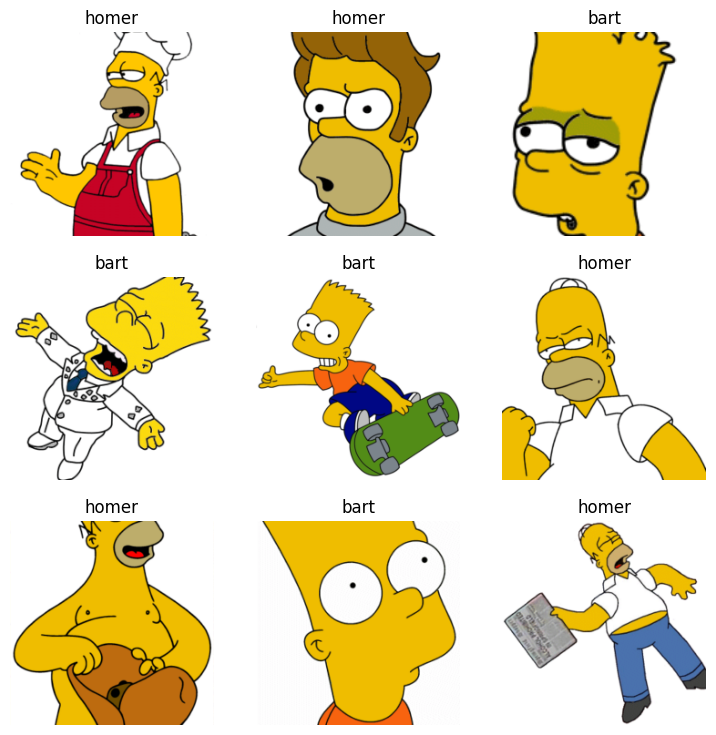

In [19]:
dls.show_batch()

In [20]:
#create model
model=vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy,error_rate]
)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 108MB/s]


In [21]:
model.fit(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.196783,0.267008,0.930233,0.069767,01:29


In [ ]:
# model.fine_tune(
#     epochs=1
# )

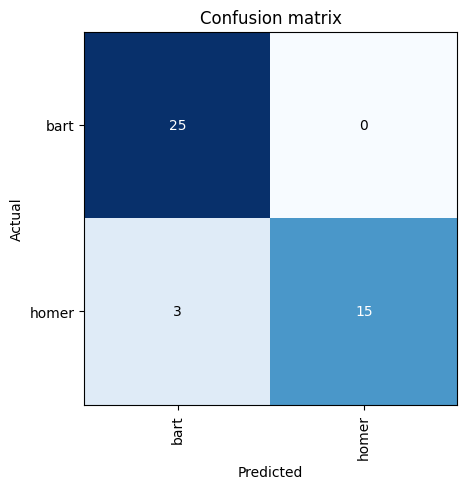

In [22]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

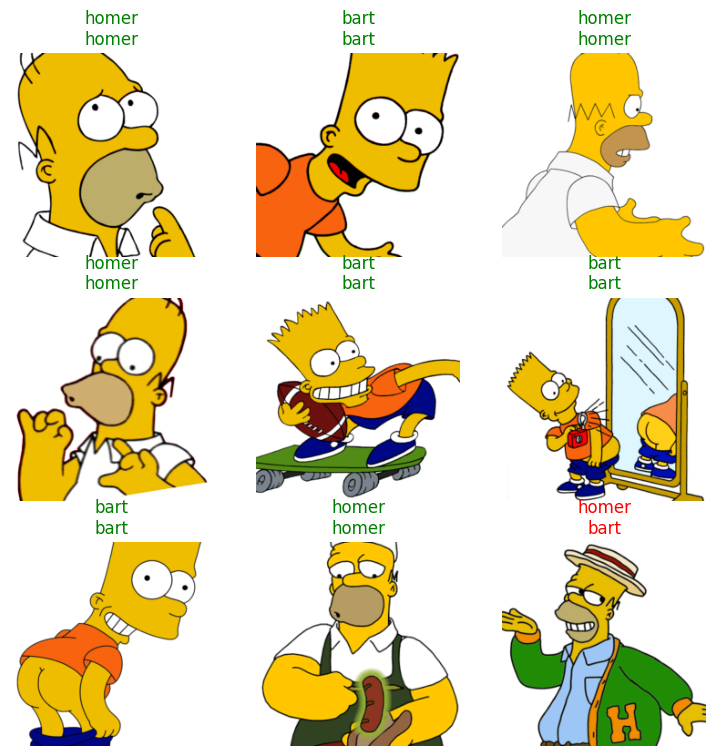

In [23]:
model.show_results()

In [24]:
#save model
model.export('homer_bart_classifier.pkl')

In [25]:
#load the model
new_model = load_learner('/content/homer_bart/training_set/homer_bart_classifier.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [26]:
new_model.predict(
    item='/content/homer_bart/training_set/bart/bart100.bmp'
)

('bart', tensor(0), tensor([9.9902e-01, 9.7997e-04]))

In [27]:
def label_func(fname):
   return fname.parent.name
dls = ImageDataLoaders.from_folder(
    Dataset_path,
    label_func=label_func,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2 # It's also good practice to include valid_pct if you intend to have a validation set
)
learn = vision_learner(dls, resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]


In [28]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.000762,0.637777,0.674419,01:00


epoch,train_loss,valid_loss,accuracy,time
0,0.584197,0.418050,0.860465,01:28


In [29]:
learn.export('model.pkl')

In [ ]:
#PS C:\Users\santhosh\Desktop\flask_apps\binary_classification> winget install --id Python.Python.3.10 -e
#py -3.10 --version
#python3.10 -m venv binary310
#.\binary310\Scripts\activate
#pip install torch==1.13.1 torchvision==0.14.1
#pip install fastai==2.7.12 fastcore==1.5.29
#pip install flask
#python -m pip install "numpy<2.0"
#import fastai
#print(fastai.__version__)

'''
from flask import Flask, render_template, request
from fastai.vision.all import *
import os
from werkzeug.utils import secure_filename
import pathlib
import sys

# Patch PosixPath to WindowsPath for compatibility
if sys.platform == "win32":
    pathlib.PosixPath = pathlib.WindowsPath'''



In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.7.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.16.0.38.47
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.6.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.4.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.6.15
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake

In [ ]:
# prompt: download all this as requirement. txt file

!pip freeze > requirements.txt

In [30]:
# This is the correct way to save a PyTorch model
torch.save(model, 'model.pkl')


In [31]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>